## Final Project Submission

* Student name: Evan Holder
* Student pace: self paced
* Scheduled project review date/time: March 25, 2-3PM EST
* Instructor name: Jeff Herman
* Blog post URL:


### Introduction
For this project, we will be reading in data from **IMDB** and from **TheMovieDB** as we set out to determine which films are currently doing the best at the box office. In our quest to answer this question, we will first state the following assumptions about the prompt:
* **Assumption 1: Films doing the best at the box office are those that bring in the most money.** The data provided included reviews/ratings/popularity variables, however these will not be considered in the analysis as they do not directly indicate how well the films are doing at the box office itself.
* **Assumption 2: Films will be evaluated on the average.** Since films have many different attributes that can affect how well they do at the box office, it is possible that averages could be much lower since types of films might be more common than others, it is possible that films the do the best at the box office COME BACK TO THIS LINE BEFORE BEING DONE

### Approach:
1. Import all the pandas libraries and data to be used in the project
2. Examine and clean **TheMovieDB** data
3. Clean / combine the **IMDB** data
4. Combine the **TheMovieDB** and **IMDB** data then clean up the main dataframe
5. Use statistcal methods to draw meaningful insites

#### 1. Import pandas libraries and data

In [1]:
#import appropriate libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import re
import seaborn as sns
%matplotlib inline

#read in IMDB data
imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_name = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

#read in TheMovieDB data
tmdb = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


#### 2. Examine and clean **TheMovieDB** data

* First check out the data types and check for any nulls
* Lets change the release_date column to a datetime object in case we need it.
* Check for duplicates
* Drop anything that does not look useful
* Check the rest of the columns for irregularities

In [169]:
# check data types and change release date to datetime object
print(tmdb.info());

# Change the release_date to datetime object
tmdb.release_date = pd.to_datetime(tmdb.release_date);

#check for duplicates
print('Number of duplicates found: ' + str(tmdb.duplicated().sum())) # no duplicates found

# Drop id column as it will not be usefull
tmdb.drop('id', axis = 1, inplace = True)

tmdb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
Number of duplicates found: 0


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,2018-12-31,Red 11,"$7,000",$0,$0
5778,1999-04-02,Following,"$6,000","$48,482","$240,495"
5779,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0


Cleaning **TheMovieDB**: 
* Now we can see that the production_budget, domestic_gross, and worldwide_gross columns are all of type string and include commas and dollars signs.  Lets write a function `to_number()` which takes in a string and returns the interger represented by the string
* Then we will be able to call the `.apply()` method on each of these columns.

In [170]:
# define function to change string $xxx,xxx,xxx format to intergers
def to_number(value):
    val = value[1:]
    if ',' in val:
        val = val.replace(',','')
    return int(val)  

In [171]:
# Call the to_number() function on each of the columns that require it
tmdb['production_budget'] = tmdb.production_budget.apply(to_number)
tmdb['domestic_gross'] = tmdb.domestic_gross.apply(to_number)
tmdb['worldwide_gross'] = tmdb.worldwide_gross.apply(to_number)

Okay, better. Now let's check for any other irregularities:
* Use `.describe()`
* Plot the distibutions

       production_budget  domestic_gross  worldwide_gross
count       5.782000e+03    5.782000e+03     5.782000e+03
mean        3.158776e+07    4.187333e+07     9.148746e+07
std         4.181208e+07    6.824060e+07     1.747200e+08
min         1.100000e+03    0.000000e+00     0.000000e+00
25%         5.000000e+06    1.429534e+06     4.125415e+06
50%         1.700000e+07    1.722594e+07     2.798445e+07
75%         4.000000e+07    5.234866e+07     9.764584e+07
max         4.250000e+08    9.366622e+08     2.776345e+09


,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000,760507625,2776345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5777,2018-12-31,Red 11,7000,0,0
5778,1999-04-02,Following,6000,48482,240495
5779,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5780,2015-09-29,A Plague So Pleasant,1400,0,0


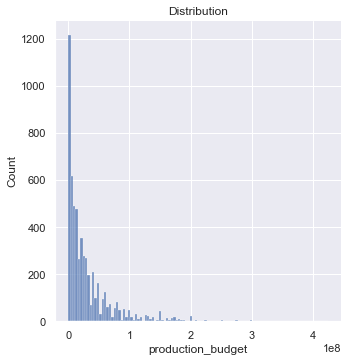

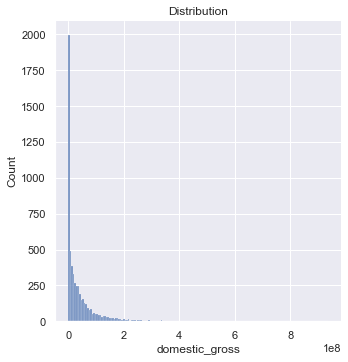

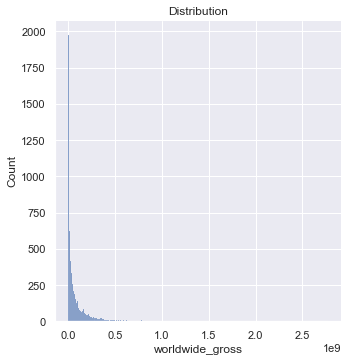

In [172]:
#print the description
print(tmdb.describe())

#plot the distribution using seaborn library
sns.set_context(context = 'notebook')
sns.set_theme();
sns.displot(data = tmdb, x ='production_budget').ax.set_title('Distribution');
sns.displot(data = tmdb, x ='domestic_gross').ax.set_title('Distribution');
sns.displot(data = tmdb, x ='worldwide_gross').ax.set_title('Distribution');
tmdb

The distribution of production_budgets, domestic_gross, and worldwide_gross are showing a ton of values at or close to zero.

<u>**Assumption</u>: Lets assume that if zero is the most occuring number, it was likely a placeholder for missing data**

We will check this using `.value_counts()` and remove the entries that grossed $0 worldwide

In [173]:
# Check which columns zero is the mode
print(tmdb.domestic_gross.value_counts().head(5))
print(tmdb.worldwide_gross.value_counts().head(5))
print(tmdb.production_budget.value_counts().head(5))

#reassign tmdb to all rows which both domestic and worldwide gross is not zero
tmdb = tmdb.loc[(tmdb.domestic_gross!=0) & (tmdb.worldwide_gross!=0)]

0           548
8000000       9
2000000       7
7000000       7
10000000      6
Name: domestic_gross, dtype: int64
0          367
8000000      9
7000000      6
2000000      6
4000000      4
Name: worldwide_gross, dtype: int64
20000000    231
10000000    212
30000000    177
15000000    173
25000000    171
Name: production_budget, dtype: int64


**3. Clean / combine the IMDB data**
* Start by combining the relevant IMDB data for this.
* Reset the index to the 'tconst' col
* Drop any duplicates
* Use join statement to join the dataframes

In [174]:
# set index to tconst for all IMDB data tables
imdb_basics.set_index('tconst', inplace = True)
imdb_crew.set_index('tconst', inplace = True)

#drop all the duplicates
imdb_basics.drop_duplicates(inplace=True)
imdb_crew.drop_duplicates(inplace=True)

#Join the imdb tables
imdb = imdb_basics.join(imdb_crew, rsuffix='_crew')
print(imdb.shape)

(146022, 7)


* Drop the unnecessary columns
* Check for nulls / drop nulls

In [175]:
#reset the index
imdb.reset_index(inplace = True)

#Drop duplicates
imdb.drop_duplicates(inplace = True)

**4. Combine the TheMovieDB and IMDB data then clean up the main dataframe**
* Reset the imdb index to 'primary_title'
* Use a join statement to join the two tables

In [176]:
imdb.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,directors,writers
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,NaN
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914"


In [177]:
#reset index for join
imdb = imdb.set_index('primary_title')
tmdb = tmdb.set_index('movie')

#Join the tables together
df = imdb.join(tmdb, how='inner', rsuffix = 'tmdb')
df.index.value_counts()

Home              48
Brothers          26
The Gift          26
The Return        20
Hamlet            16
                  ..
Swimming Pool      1
Baby Boy           1
Still Alice        1
Easy A             1
Before Sunrise     1
Length: 2003, dtype: int64

Notice how there are a lot of rows that have the same titles.  Each of these rows with the same title received duplicate information from all of the columns in the joined (tmdb) table.  We will need to weed out the rows that did not match our title from the tmdb table.
* Start by removing the rows in which the start_year does not match the release_date column
* If there are still duplicates, we will need to remove all the duplicate titles (including the original since we cannot be sure that we have matched the correct movies between the two tables).

In [178]:
#drop rows where the release_date_mdb1 and start_year are not the same year
df = df.loc[df.start_year==pd.DatetimeIndex(df.release_date).year] 

#get rid of all rows contining duplicates, include the original
titles_to_remove = df.loc[df.index.duplicated()==True].index
titles = [] 
for i in titles_to_remove: 
    if i not in titles: 
        titles.append(i)
for t in titles:
    df = df.drop(t)

#Check if there are any other duplicates in the dataframe
print('There are', df.duplicated().sum(), 'duplicates')
df.index.value_counts()

There are 0 duplicates


Run All Night              1
Deepwater Horizon          1
The Muppets                1
The Nutcracker in 3D       1
Ant-Man                    1
                          ..
21 Jump Street             1
Love the Coopers           1
Mirror Mirror              1
Yeh Jawaani Hai Deewani    1
Triple 9                   1
Length: 1273, dtype: int64

In [179]:
df.head()

,tconst,original_title,start_year,runtime_minutes,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross
10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",nm0870469,"nm1061091,nm1173295,nm3227090",2016-03-11,5000000,72082999,108286422
10 Days in a Madhouse,tt3453052,10 Days in a Madhouse,2015,111.0,Drama,nm0385725,nm0385725,2015-11-11,12000000,14616,14616
12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",nm3350420,"nm0848217,nm0185976,nm3066678",2018-01-19,35000000,45819713,71118378
12 Years a Slave,tt2024544,12 Years a Slave,2013,134.0,"Biography,Drama,History",nm2588606,"nm0725983,nm1185849",2013-10-18,20000000,56671993,181025343
127 Hours,tt1542344,127 Hours,2010,94.0,"Adventure,Biography,Drama",nm0000965,"nm0000965,nm0064479,nm1737008",2010-11-05,18000000,18335230,60217171


<u> Release Month </u>

Lets create a column for the release month, since we will want to see in which month movies that do the best at the box office are released. Extract the month from the release month column and add it to a new column called 'release_month.

In [180]:
#Get all the release months into one list
release_month = list(df.release_date.apply(lambda x: x.month_name()).values)
df['release_month'] = release_month

In [181]:
df.head()

,tconst,original_title,start_year,runtime_minutes,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross,release_month
10 Cloverfield Lane,tt1179933,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",nm0870469,"nm1061091,nm1173295,nm3227090",2016-03-11,5000000,72082999,108286422,March
10 Days in a Madhouse,tt3453052,10 Days in a Madhouse,2015,111.0,Drama,nm0385725,nm0385725,2015-11-11,12000000,14616,14616,November
12 Strong,tt1413492,12 Strong,2018,130.0,"Action,Drama,History",nm3350420,"nm0848217,nm0185976,nm3066678",2018-01-19,35000000,45819713,71118378,January
12 Years a Slave,tt2024544,12 Years a Slave,2013,134.0,"Biography,Drama,History",nm2588606,"nm0725983,nm1185849",2013-10-18,20000000,56671993,181025343,October
127 Hours,tt1542344,127 Hours,2010,94.0,"Adventure,Biography,Drama",nm0000965,"nm0000965,nm0064479,nm1737008",2010-11-05,18000000,18335230,60217171,November


<u> Genre Column </u>

The **df.genres** column contains strings, or lists of strings, each being a genre.  Eventually we will want to create a dataframe that we can group by genre.  For this, we will need to break apart the genre strings so they are more useable.  The approach we will take is copy each row of data exactly as is, except the genre column.  The genre column will be assigned exactly one genre from the original string. So if there is one genre, only one copy will be created for that row. If there are two genres, two copies of that row will be made, one for each genre. If there are three genres, three copies, three different genres...
* We will need to first figure out what the range of genres is that we are dealing with.  Let's iterate through each row of the genres column and find all the unique genres.

In [182]:
#Check for null values
df.genres.isna().sum()

0

In [183]:
# Get list of all listed genres
genres = []
for value in df['genres']:
    if ',' in value:
        genre_list  = value.split(',')
        for genre in genre_list:
            if genre in genres:
                pass
            else:
                genres.append(genre)
    else:
        if genre in genres:
            pass
        else:
            genres.append(value)
print('There are', len(genres), 'genres.')

There are 21 genres.


Good, so there are 21 unique genres. Now, we want a dataframe that we can group by genre. Lets create a list of nested list.  Each nested list will correlate to one attribute/column of the new dataframe we want to create. Then, iterate through each row of the existing dataframe.  Make as many copies of each attribute as there are genres in that row, and append each entry into the designated list for that attribute.

In [184]:
#Create list of nested lists, 8 columns (including the index)
genre_list = [[],[],[],[],[],[],[],[]]

#append each list with copies of each row, for each genre present in each row
for index, row in enumerate(df.genres):
    if ',' in row:
        temp = row.split(',')
        for genre in temp:
            genre_list[0].append(genre)
            genre_list[1].append(df.runtime_minutes[index])
            genre_list[2].append(df.start_year[index])
            genre_list[3].append(df.release_month[index])
            genre_list[4].append(df.directors[index])
            genre_list[5].append(df.production_budget[index])
            genre_list[6].append(df.domestic_gross[index])
            genre_list[7].append(df.worldwide_gross[index])
    else:
        genre_list[0].append(row)
        genre_list[1].append(df.runtime_minutes[index])
        genre_list[2].append(df.start_year[index])
        genre_list[3].append(df.release_month[index])
        genre_list[4].append(df.directors[index])
        genre_list[5].append(df.production_budget[index])
        genre_list[6].append(df.domestic_gross[index])
        genre_list[7].append(df.worldwide_gross[index])

print('The number of attribute is:', len(genre_list))
print('Each attribute has:', len(genre_list[0]),'rows')

The number of attribute is: 8
Each attribute has: 3306 rows


Create new dataframe based on the above genre_list:

In [185]:
#list of attributes
attribute_list = ['runtime_minutes', 'start_year', 'release_month', 'directors',
                  'production_budget', 'domestic_gross', 'worldwide_gross']

#create new dataframe with each attribute
df2 = pd.DataFrame(index = genre_list[0])
for i, v in enumerate(attribute_list):
    df2[v] = genre_list[i+1]

#preview result
df2

,runtime_minutes,start_year,release_month,directors,production_budget,domestic_gross,worldwide_gross
Drama,103.0,2016,March,nm0870469,5000000,72082999,108286422
Horror,103.0,2016,March,nm0870469,5000000,72082999,108286422
Mystery,103.0,2016,March,nm0870469,5000000,72082999,108286422
Drama,111.0,2015,November,nm0385725,12000000,14616,14616
Action,130.0,2018,January,nm3350420,35000000,45819713,71118378
...,...,...,...,...,...,...,...
Animation,108.0,2016,March,"nm1158544,nm0397174,nm0601781",150000000,341268248,1019429616
Comedy,108.0,2016,March,"nm1158544,nm0397174,nm0601781",150000000,341268248,1019429616
Action,107.0,2017,January,nm0142286,85000000,44898413,345033359
Adventure,107.0,2017,January,nm0142286,85000000,44898413,345033359


**5. Use statistcal methods to draw meaningful insites**

<u>Which genres are currently doing the best at the box office?</u>

**Assumptions:**
* Assume that doing the best at the box office means which genres make the most **on average**.

Let's start by manipulating the data to get the means of **domestic_gross**, **worldwide_gross**, and **production_gross** by genre.
* For each attribute above, create a dictionary with the (keys=genres) and (values=attribute's means)
* Add these attribute to a new dataframe 'means'
* Finally we will plot top five genres that make the most domestically


Text(0, 0.5, 'Gross Revenue ($)')

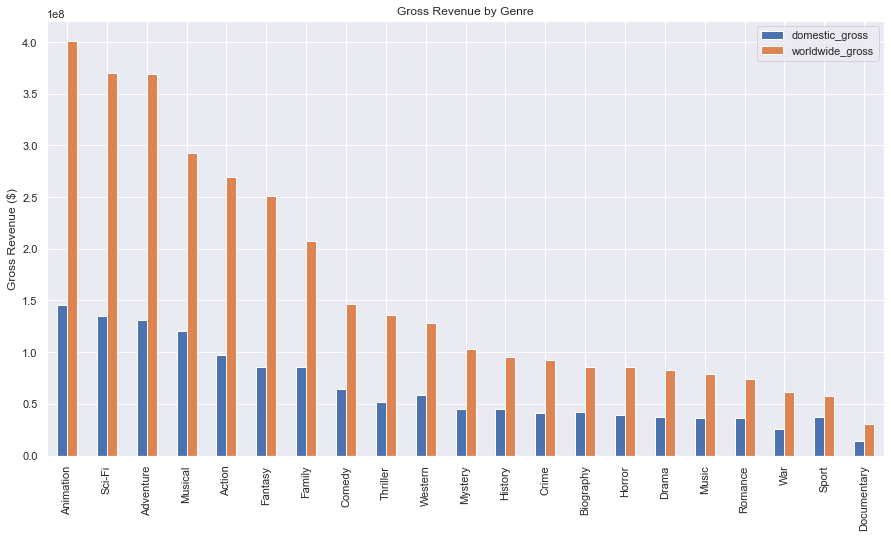

In [186]:
#group the data by genre and aggregate the mean
grouped_gross = df2.groupby(by=df2.index).mean()[['domestic_gross', 
                                                  'worldwide_gross']].sort_values('worldwide_gross', ascending = False)

#create a barplot showing both domestic and worldwide means
fig1 = grouped_gross.plot(kind = 'bar', figsize=[15,8]);
plt.title('Gross Revenue by Genre');
plt.ylabel('Gross Revenue ($)')

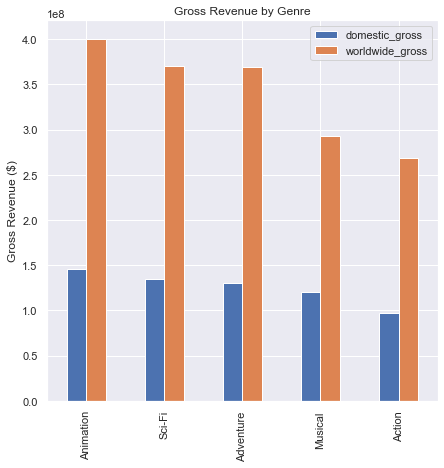

In [187]:
#recreate plot for presentation showing top 5
top_means = grouped_gross.head()
fig2 = top_means.plot(kind = 'bar', figsize=[7,7]);
plt.title('Gross Revenue by Genre');
plt.ylabel('Gross Revenue ($)');

#seaborn plot
#ax2 =sns.barplot(x=top_means.index, y='worldwide_gross', data = top_means)

Next, let's check out if there is any change worldwide_gross over the 9 years we have data for.  For this, we wil plot the average of each genre over the last 9 years. Lets use a seaborn lineplot.

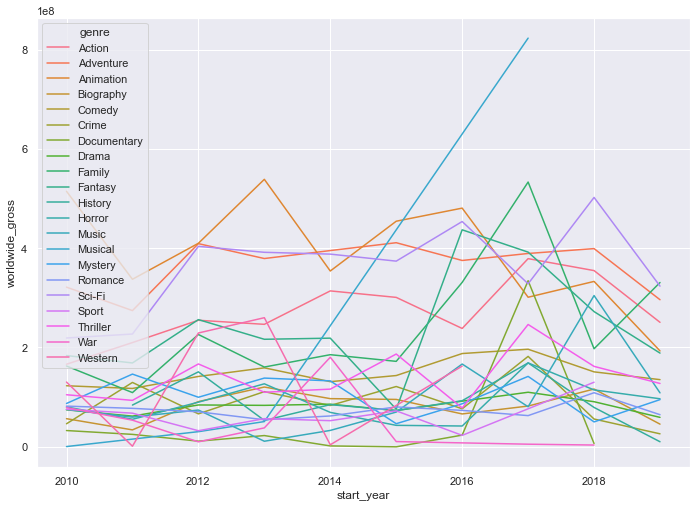

In [188]:
#regroup the dataframe by genre and start_year, 
gross_yr_genre = df2.groupby(by=[df2.index, 'start_year']).mean()

#reset index and rename columns, drop unnecessary columns
gross_yr_genre.reset_index(inplace = True)
gross_yr_genre.rename(columns={'level_0': 'genre'}, inplace=True)
gross_yr_genre.drop(['runtime_minutes', 'production_budget','domestic_gross'], axis = 1, inplace = True)

#Plot using seaborn, worldwide_gross for each genre, over the last 9 years
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='start_year', y='worldwide_gross', data=gross_yr_genre, hue='genre', ci = None);

In [189]:
df2.index.value_counts()

Drama          617
Comedy         454
Action         394
Adventure      325
Thriller       214
Crime          200
Romance        166
Horror         134
Biography      124
Sci-Fi         124
Fantasy        107
Mystery        107
Animation       92
Family          80
Music           45
History         36
Sport           30
Documentary     26
War             16
Western          9
Musical          6
dtype: int64

There's a lot going on in that last visualization, lets plot each of these lineplots separately using subplots to make them clearer.

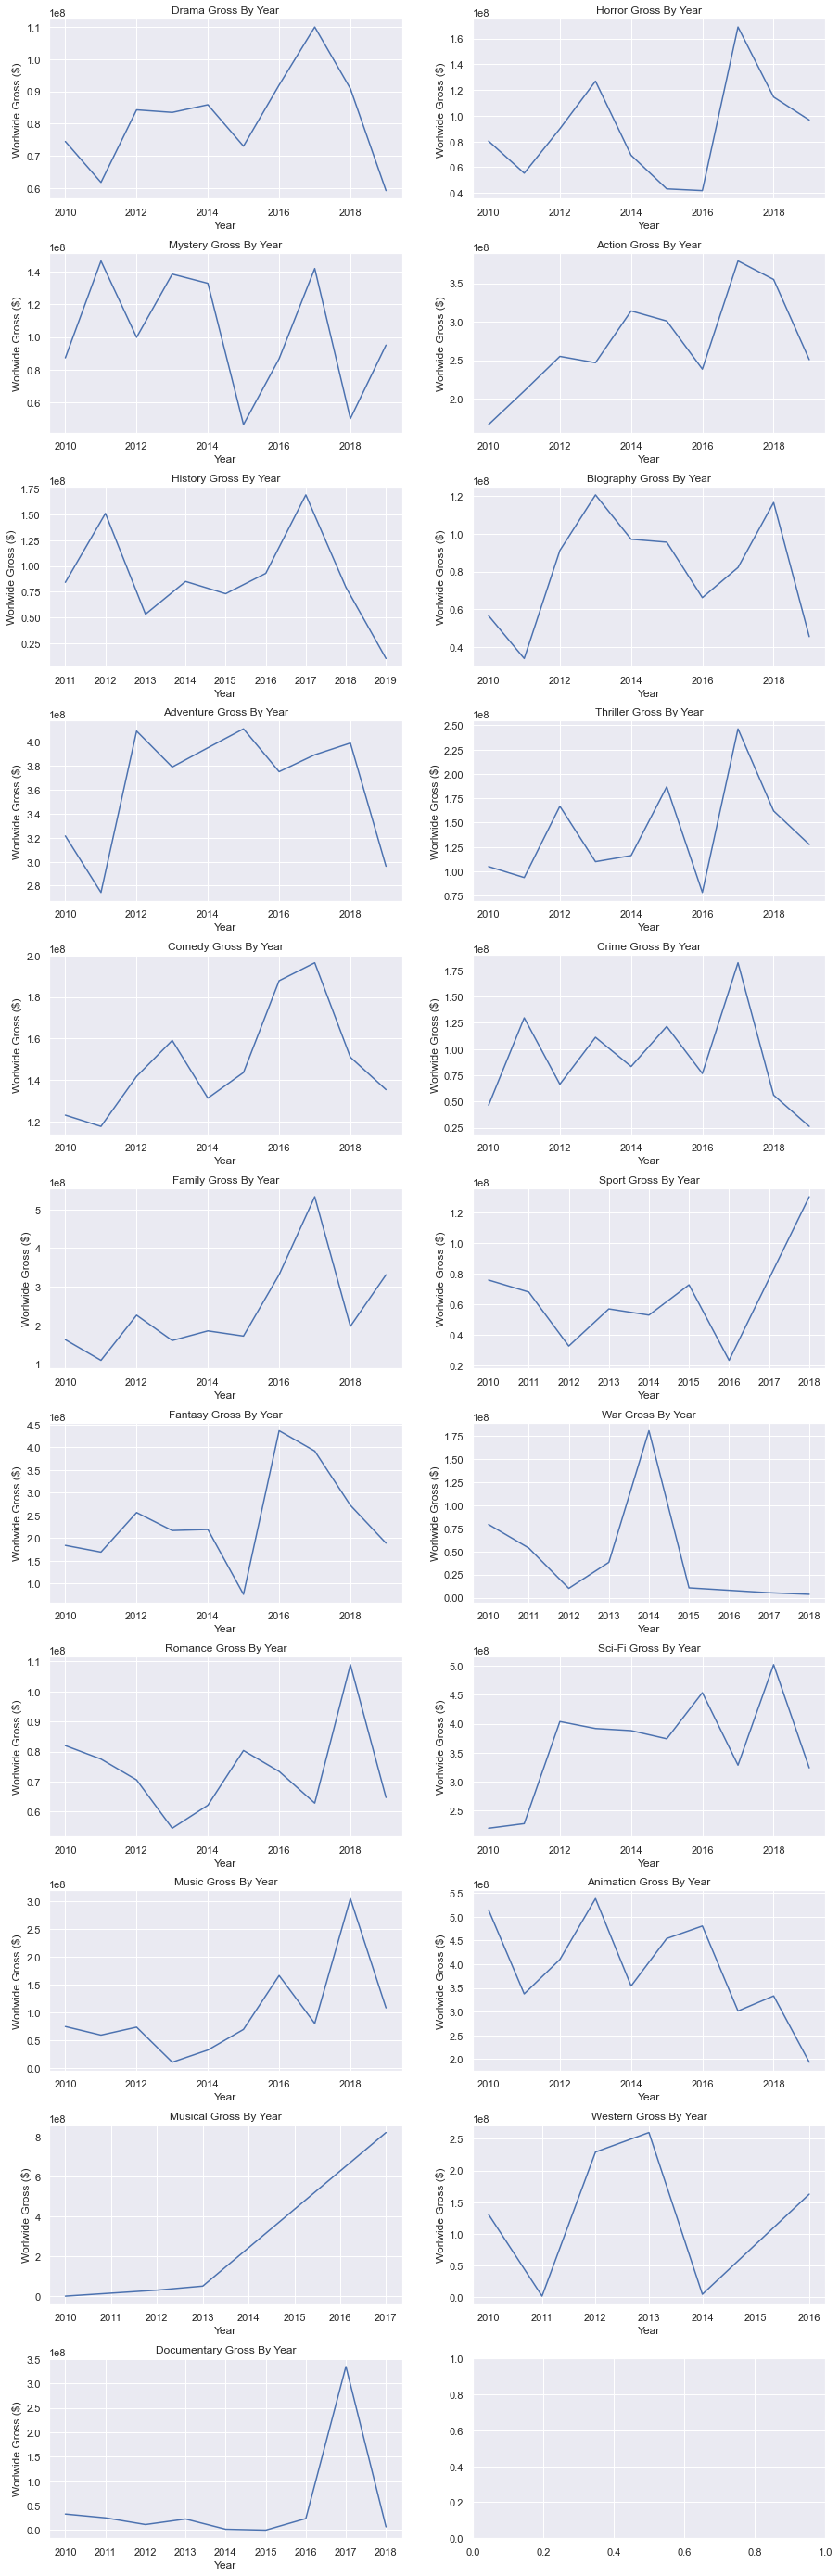

In [190]:
#Get dataframe by genre, and by year
gross_yr_genre = df2.groupby(by=[df2.index, 'start_year']).mean()
gross_yr_genre.reset_index(inplace = True)
gross_yr_genre.rename(columns={'level_0': 'genre'}, inplace=True)
gross_yr_genre.drop(['runtime_minutes', 'production_budget','domestic_gross'], axis = 1, inplace = True)

# plot a line plot for gross by year by genre
fig, axes = plt.subplots(nrows=11, ncols = 2, figsize=(15,50))
plt.subplots_adjust(hspace=.3)
#sns.set_context(context = 'notebook')
for index, genre in enumerate(genres):
    row = index//2
    col = index%2
    temp = gross_yr_genre.loc[gross_yr_genre.genre == genre]
    ax = axes[row][col];
    ax.plot(list(temp.start_year), list(temp.worldwide_gross))
    ax.set_xlabel('Year')
    ax.set_ylabel('Worlwide Gross ($)')
    ax.set_title('{} Gross By Year'.format(genre))

That was better, lets see if it's more clear when we fit a regression line to the data points.  Let's see if any genres stand out as trending highly positive or negative.

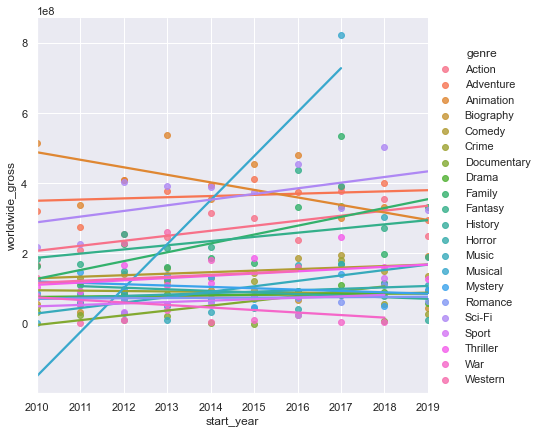

In [191]:
#Using seaborn we 
sns.lmplot(x='start_year', y='worldwide_gross', data=gross_yr_genre, hue='genre', height = 6, ci = None);

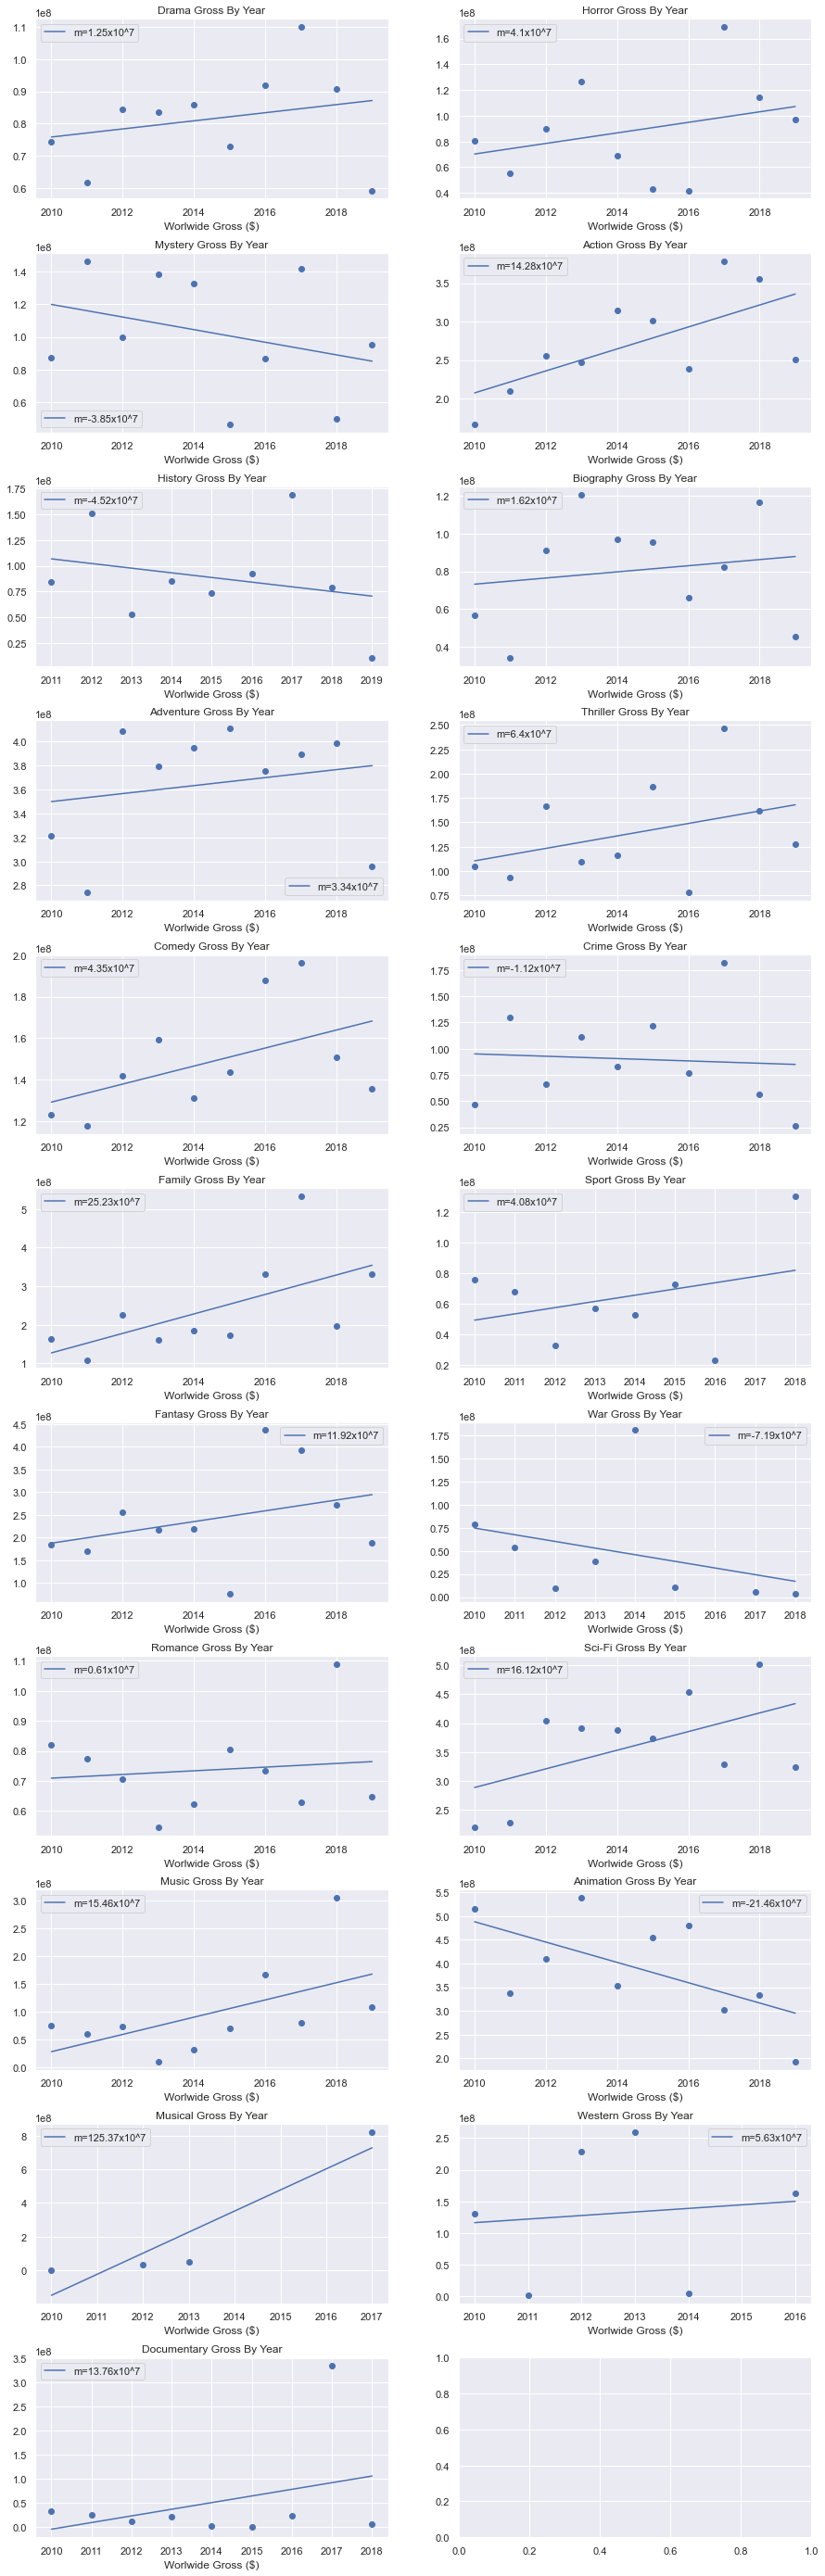

In [192]:
# plot a regression line on a scatter plot for gross by year by genre
fig, axes = plt.subplots(nrows=11, ncols = 2, figsize=(15,50))
plt.subplots_adjust(hspace=.3)
genre_trends= []
#sns.set_context(context = 'notebook')
for index, genre in enumerate(genres):
    row = index//2
    col = index%2
    temp = gross_yr_genre.loc[gross_yr_genre.genre == genre]
    x = np.array(list(temp.start_year))
    y = np.array(list(temp.worldwide_gross))
    ax = axes[row][col];
    ax.scatter(x, y)
    
    # create regression line and plot
    m, b = np.polyfit(x, y, 1)
    ax.plot(x,m*x+b, label='m={}x10^7'.format(round(m/1000000, 2)))
    
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_xlabel('Worlwide Gross ($)')
    ax.set_title('{} Gross By Year'.format(genre))
    
    genre_trends.append([genre, '{}x10^7'.format(round(m/1000000, 2))])

Based on the above plot, it appears one genre, Musical, is trending positive.  The rest are relatively flat.  Let's check out the genre data for any irregularities.

In [193]:
print('Genre counts:\n\n', df2.index.value_counts())
print('\n\nGenre trends list:\n', genre_trends)
df2.loc[df2.index=='Musical']

Genre counts:

 Drama          617
Comedy         454
Action         394
Adventure      325
Thriller       214
Crime          200
Romance        166
Horror         134
Biography      124
Sci-Fi         124
Fantasy        107
Mystery        107
Animation       92
Family          80
Music           45
History         36
Sport           30
Documentary     26
War             16
Western          9
Musical          6
dtype: int64


Genre trends list:
 [['Drama', '1.25x10^7'], ['Horror', '4.1x10^7'], ['Mystery', '-3.85x10^7'], ['Action', '14.28x10^7'], ['History', '-4.52x10^7'], ['Biography', '1.62x10^7'], ['Adventure', '3.34x10^7'], ['Thriller', '6.4x10^7'], ['Comedy', '4.35x10^7'], ['Crime', '-1.12x10^7'], ['Family', '25.23x10^7'], ['Sport', '4.08x10^7'], ['Fantasy', '11.92x10^7'], ['War', '-7.19x10^7'], ['Romance', '0.61x10^7'], ['Sci-Fi', '16.12x10^7'], ['Music', '15.46x10^7'], ['Animation', '-21.46x10^7'], ['Musical', '125.37x10^7'], ['Western', '5.63x10^7'], ['Documentary', '13.76x10^7'

,runtime_minutes,start_year,release_month,directors,production_budget,domestic_gross,worldwide_gross
Musical,129.0,2017,March,nm0174374,160000000,504014165,1259199706
Musical,123.0,2012,June,nm0788202,70000000,38518613,61031932
Musical,105.0,2010,July,nm0706296,5600000,531806,531806
Musical,106.0,2012,October,nm0120526,2000000,2436,2436
Musical,105.0,2017,December,nm1243905,84000000,174340174,386665550
Musical,160.0,2013,May,nm2209781,8300000,3827466,50827466


**Genre Conclusion:** 

The top five genres by average gross worldwide are:
1. Animation
2. Sci-Fri
3. Adventure
4. Musical
5. Action

And, when you look at the average gross for each genre by year, you see that most of them do not have a strong trendline positive or negative over the last 9 years.  The only one in the top five the has a pretty steep positive trend is Musical. However when we looked at the data, we saw that there were only six total data points for movies in the Musical category.  That a small amount of data especially compared to others in the top five that all have at least 90 data points.  For that reason I would knock Musical out of the top five money-making genres - there isn't enough data to support its money-making potential.

On the filp side the most significant negative trend is in animation(-21.46x10^7 dollars/yr), which does not bode well for animation averages in the future.  Finally, we can see the 2nd most positive trend is Sci-Fi (16.12x10^7 dollars/yr). Sci-Fi would be the most positive trending genre except for the lack of data in he musical genre. In addition, it is the second gross producting movie genre on average over the last 9 years.


**<u>Insight #1</u>: Make a Sci-Fi movie as it is trending positive and is on average the second most grossing genre worldwide in the last 9 years.**

Next attribute we will look at is month.


<u>Which month, on average is the best month to release a movie?</u>

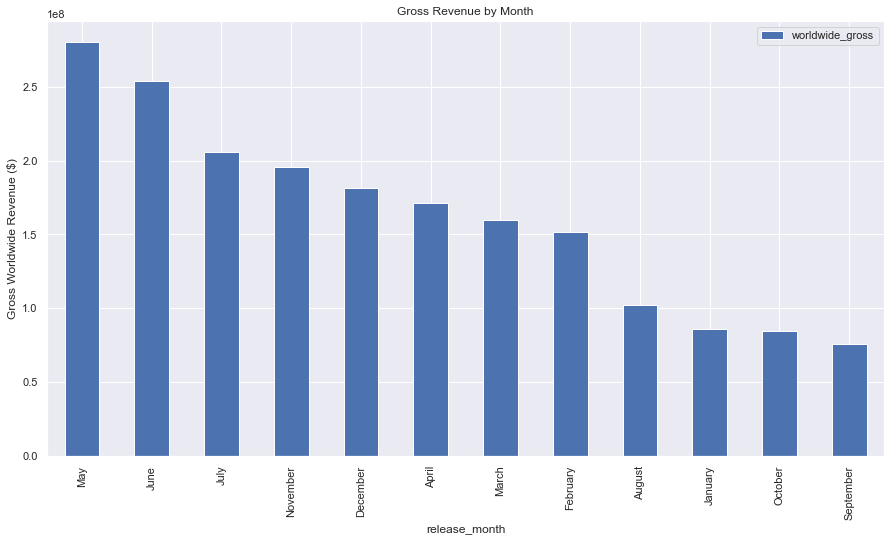

In [194]:
key = {'January':1, 'February': 2, 'March': 3, 'April':4, 'May':5, 'June': 6,
       'July':7, 'August': 8, 'September': 9, 'October':10, 'November':11, 'December':12,}
df_month = df[['release_month', 'worldwide_gross']].groupby(by='release_month').mean()

df_month.reset_index(inplace = True)
df_month['Month_num'] = df_month.release_month.apply(lambda x: key[x])
df_month.sort_values(by='worldwide_gross', inplace = True, ascending = False)
df_month.drop('Month_num', axis=1, inplace = True)

# Create bar plot showin average gross revenue by month
fig3 = df_month.plot(kind = 'bar', figsize=[15,8], x='release_month');
plt.title('Gross Revenue by Month');
plt.ylabel('Gross Worldwide Revenue ($)');

As shown in the bar chart above, movies released in May make the most money on average.

**<u>Insight #2</u>: Release the movie in the month of May.**

Next let's look at the runtime and try to see how long the movie should be.

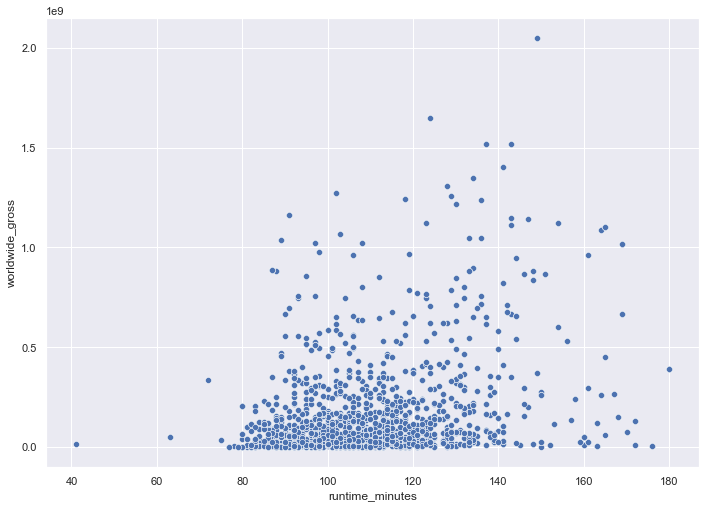

In [195]:
sns.scatterplot(x='runtime_minutes', y='worldwide_gross', data = df2);

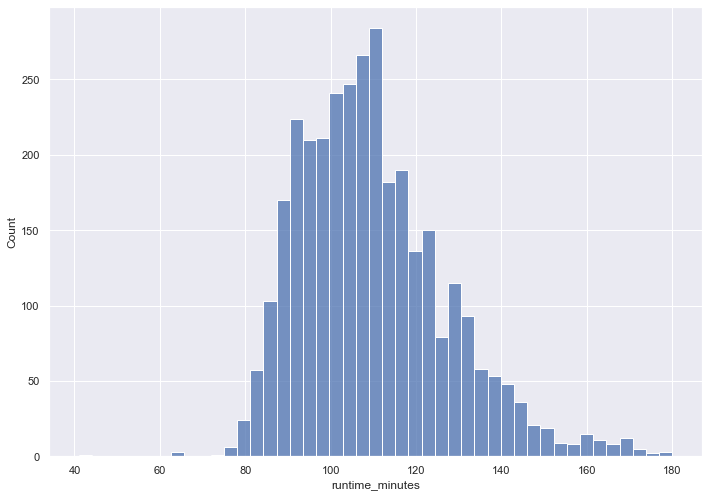

In [196]:
sns.histplot(x='runtime_minutes', data = df2);

Looking first at the scatterplot above, its easy to see that no movie less than 80 minutes long made more than $100,000,000. after that the data is really scattered. It's hard to say much about the runtime since its not easy to fit a line to this scatterplot.  The histogram plotted above also shows very few movies are less than 80 minutes long.

**<u>Insight #3</u>: Make the movie at least 80 minutes long.**

Now lets look at production budget:

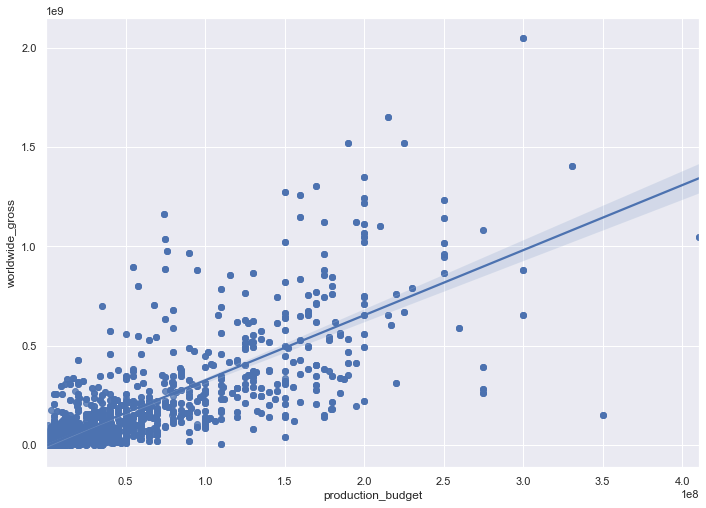

In [197]:
sns.regplot(x='production_budget', y='worldwide_gross', data = df2);

In [198]:
# estimate slope of regression line
delta_y = .5*10**(9)
delta_x = 1.5*10**(8)
m = str(round(delta_y/delta_x,1))
print('For every $1 spent, $' + m + ' dollars will be earned.')

For every $1 spent, $3.3 dollars will be earned.


Using the scatterplot above and fitting the regression line, it is pretty clear that we have a trend here.  Essentially a positively sloped line.

**<u>Insight #4</u>: The more you spend (budget) the more you make. If you want to make more money, do not skimp on the budget.**

**Bonus:**
Let's pick a director for our Sci-Fi film. We will want the director whose Sci-Fi films make the most money on average. So, we'll start by filtering our dataframe to show the Sci-Fi films only. Then, like we did for the genres, we will have to split each row out for each director, so if there is more than one director for a film, that film will get duplicate rows in our new dataframe (one for each director).


In [206]:
df_directors = df2.copy()
df_directors = df_directors.loc[df_directors.index=='Sci-Fi']
df_directors.drop(['runtime_minutes', 'start_year', 'release_month','domestic_gross', 
                   'production_budget'], axis = 1, inplace = True)
df_directors.dropna(inplace = True)
df_directors

,directors,worldwide_gross
Sci-Fi,nm1024677,334522294
Sci-Fi,nm0000631,238521247
Sci-Fi,nm0001675,402976036
Sci-Fi,nm1294036,30295028
Sci-Fi,nm2648685,2102779
...,...,...
Sci-Fi,nm0281508,853628605
Sci-Fi,nm0006476,31124367
Sci-Fi,nm0001741,542537546
Sci-Fi,nm0001741,747862775


In [207]:
#Create list of nested lists, 8 columns (including the index)
director_list = [[],[]]

#append each list with copies of each row, for each genre present in each row
for index, row in enumerate(df_directors.directors):
    if ',' in row:
        temp = row.split(',')
        for director in temp:
            director_list[0].append(director)
            director_list[1].append(df_directors.worldwide_gross[index])
    else:
        director_list[0].append(row)
        director_list[1].append(df_directors.worldwide_gross[index])
        
print('Each attribute has:', len(director_list[0]),'rows')

Each attribute has: 120 rows


In [208]:
#list of attributes
attribute_list = ['director', 'worldwide_gross']

#create new dataframe with each attribute
df3 = pd.DataFrame()
for i, v in enumerate(attribute_list):
    df3[v] = director_list[i]

#preview result
df3.loc[(df3.director =='nm0751577') | (df3.director =='nm0751648')]

,director,worldwide_gross
11,nm0751577,2048134200
12,nm0751648,2048134200
17,nm0751577,1140069413
18,nm0751648,1140069413
20,nm0751577,714401889
21,nm0751648,714401889


In [209]:
def get_name(crew_member):
        return imdb_name.loc[imdb_name.nconst == crew_member, 'primary_name'].iloc[0]

In [210]:
df3['director_name'] = df3.director.apply(get_name)
df3

,director,worldwide_gross,director_name
0,nm1024677,334522294,John Krasinski
1,nm0000631,238521247,Ridley Scott
2,nm0001675,402976036,Robert Rodriguez
3,nm1294036,30295028,Nima Nourizadeh
4,nm2648685,2102779,Mike Cahill
...,...,...,...
115,nm0281508,853628605,Ruben Fleischer
116,nm0006476,31124367,Paul McGuigan
117,nm0001741,542537546,Bryan Singer
118,nm0001741,747862775,Bryan Singer


In [211]:
df3.groupby(by='director_name').mean().sort_values(by='worldwide_gross', ascending=False).head()

,worldwide_gross
director_name,
Colin Trevorrow,1.648855e+09
Joss Whedon,1.460475e+09
Ryan Coogler,1.348258e+09
J.A. Bayona,1.305773e+09
Anthony Russo,1.300869e+09


Colin Trevorrow is the director with the highest average worldwide gross for Sci-Fi films. 

**<u>Insight #5</u>: Hire Peter Berg to direct the Sci-Fi film.**

And all the insites together:
* Make a Sci-Fi film
* Release it in the month of May
* Make the movie 80 minutes or more
* The more you spend the more you will make, so do not skimp on the budget
* Hire Peter Berg to direct the film